# Pymaceuticals Inc.
---

### Analysis

- Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

# Observable Trends & Inferences

* **1** Given that the drugs 'Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin' are considered to be the most promising in this study and based on the summary statistics table of the tumor volume for each drug regimen, it seems 'Propriva' could be another drug worth looking into the results more closely. In specific, Propriva has comparable if not better numbers across all the columns than Infubinol and Ceftamin in the tumor_summary_df.<br><br>

* **2** Over the long term, Capumolin appears to be an incredibly effective treatment in regard to shrinking the treated mice' tumor volume. In specific, while the effect of the treatment is not necessarily immediate, it does begin to show positive results between the 10 to 20 day mark and increases in its effect thereafter.<br><br>

* **3** In regard to the scatter plot of mouse weight vs the average tumor volume, there appears to be a strong correlation between the weight of a mouse and its average tumor volume. The heavier the mouse, the larger the tumor. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
complete_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
findduplicate = complete_df[complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate = findduplicate['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedata_df = complete_df[complete_df['Mouse ID'].isin(duplicate)]
mousedata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df[~complete_df['Mouse ID'].isin(duplicate)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tumor_med = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_var = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tumor_std = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                 "Median Tumor Volume": tumor_med,
                                 "Tumor Volume Variance": tumor_var,
                                 "Tumor Volume Std. Dev.": tumor_std,
                                 "Tumor Volume Std. Err.": tumor_sem
                                })

tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_agg = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

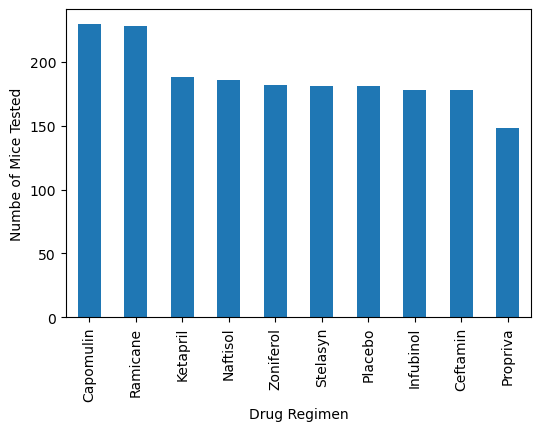

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using Pandas.

# Get total number of timepoints for all mice by drug regimen
regimen_data = cleaned_df['Drug Regimen'].value_counts()

# Configure plot, figsize, title, and axis labels
regimen_bar = regimen_data.plot(kind="bar", facecolor="tab:blue", figsize=(6,4),                                
                                xlabel="Drug Regimen",
                                ylabel="Numbe of Mice Tested")

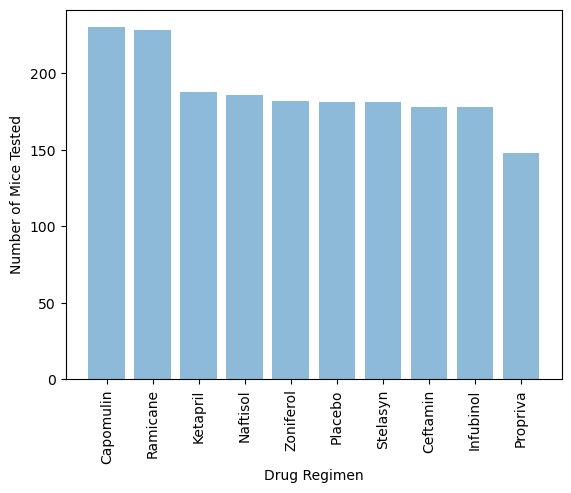

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using pyplot.

# Get list for number of mice tested per drug regimen and use index to create drug_regimen list
mice_tested = (cleaned_df.groupby('Drug Regimen')['Timepoint'].count()).sort_values(ascending=False)
drug_regimen = mice_tested.index

# Set x and y labels and orient xticks for readability, plot bar chart. Show chart.
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.bar(drug_regimen, mice_tested, color='tab:blue', alpha=0.5, align="center")
plt.show()

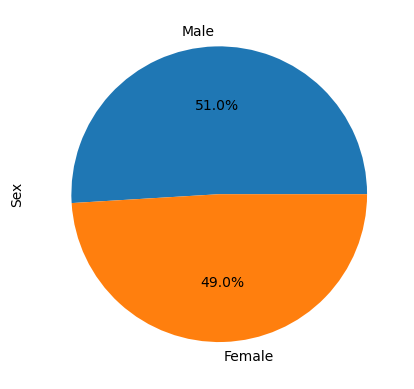

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get total number of male and female mice
gender_data = cleaned_df['Sex'].value_counts()
colors=['tab:blue', 'tab:orange']

# Create the pie chart based upon the values above
gender_pie = gender_data.plot(kind="pie", y='Sex', autopct='%1.1f%%', colors=colors)

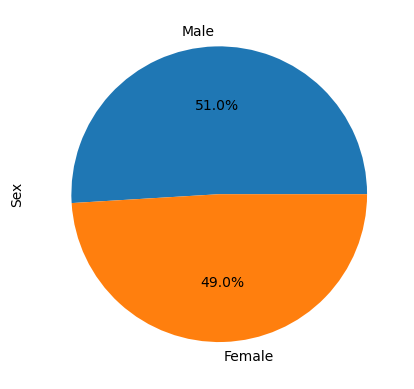

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get list for gender data and create lists for labels and colours
gender_data_py = cleaned_df['Sex'].value_counts()
labels = gender_data.index
colors = ['tab:blue', 'tab:orange']

# Set y label, plot pie chart. Show chart.
plt.ylabel("Sex")
plt.pie(gender_data_py, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Declare function to determine greatest time point and corresponding tumor volume via .tail
def lasts(df_):
    '''sorts DataFrame by Timepoint and returns final entry for Timepoint and corresponding Tumor Volume (mm3)'''
    df_[['Final Timepoint', 'Tumor Final']] = (df_.sort_values('Timepoint').tail(1)[['Timepoint',
                                                                                       'Tumor Volume (mm3)']])
    return df_

# Apply function and create DataFrame with retrieved information
finals_df = ((cleaned_df.groupby('Mouse ID').apply(lasts)).dropna()[['Mouse ID', 
                                                                       'Final Timepoint', 
                                                                       'Tumor Final']]).reset_index(drop=True)

# Merge this finals_df with the original cleaned_df DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, finals_df, how="left", on="Mouse ID")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint,Tumor Final
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.0,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,0.0,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,35.0,71.905117
3,a457,0,45.000000,0,Ketapril,Female,11,30,10.0,49.783419
4,c819,0,45.000000,0,Ketapril,Male,21,25,40.0,62.175705
...,...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45.0,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45.0,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45.0,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,45.0,58.634971


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    patient_locate = merged_df.iloc[list(merged_df['Drug Regimen'] == x), 9]

    # add subset 
    volume_data.append(patient_locate)

    # Determine quartiles and iqr
    quartiles = merged_df.loc[merged_df['Drug Regimen'] == x, ['Tumor Final']].quantile([.25,.5,.75])
    lowerq = quartiles.iloc[0, 0]
    upperq = quartiles.iloc[2, 0]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x}'s potential outliers: {lower_bound} {upper_bound}")

Capomulin's potential outliers: 20.70456164999999 51.83201549
Ramicane's potential outliers: 19.522788129999995 50.38291325
Infubinol's potential outliers: 43.28428740999999 79.94448597000002
Ceftamin's potential outliers: 52.25999677499999 72.21174041500001


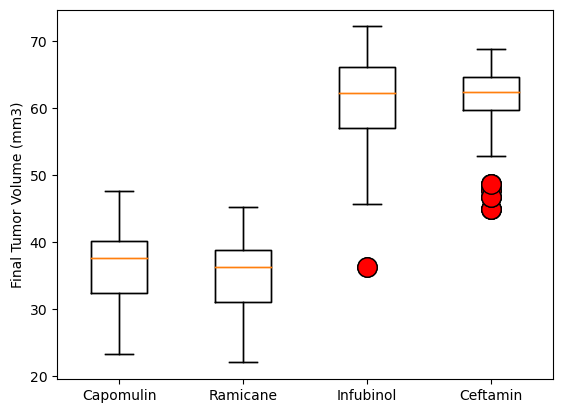

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Treatment, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(volume_data)

# Set the colors for each distribution
flierprops = dict(marker='o', markerfacecolor='red', markersize=14)
ax.boxplot(volume_data, flierprops = flierprops)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

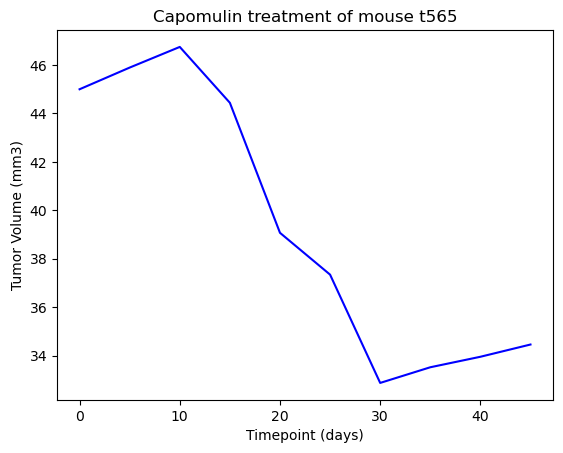

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create reduced dataframe of Capomulin specific results via .loc
capomulin = merged_df.loc[merged_df['Drug Regimen'] == "Capomulin", ['Mouse ID',
                                                                       'Timepoint', 
                                                                       'Tumor Volume (mm3)', 
                                                                       'Weight (g)']]
capomulin.columns = ['ID', 
                     'Timepoint', 
                     'Volume', 
                     'Weight']

# Set variable for specific ID
mouse = "t565"

# Retrieve information for eventual x and y values via .loc of capomulin dataframe
timepoints = capomulin.loc[capomulin['ID'] == mouse, 'Timepoint']    
tumorvolume = capomulin.loc[capomulin['ID'] == mouse, 'Volume']    
tumorvolume

# Generate line plot
volume_time_line = plt.plot(timepoints, tumorvolume, color="blue")
plt.title(f"Capomulin treatment of mouse {mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

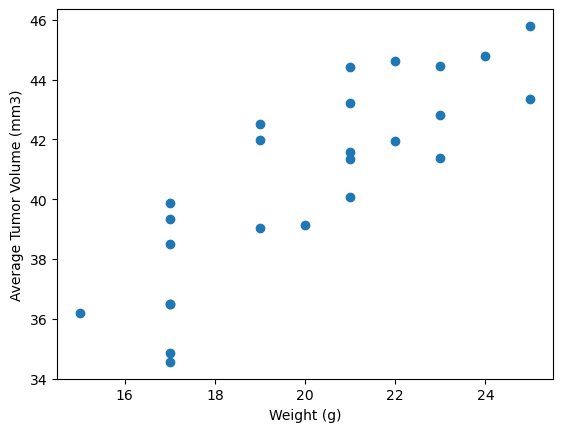

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Retrieve information for eventual x and y values via .groupby of capomulin dataframe
tumor_avg = capomulin.groupby('ID').Volume.mean()
weights = capomulin.groupby('ID').Weight.min()

# Optional: set variable for labels
xlabel = 'Weight (g)'
ylabel = 'Average Tumor Volume (mm3)'

# Generate scatter Plot 
x_values = weights
y_values = tumor_avg
plt.scatter(x_values,y_values)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

## Correlation and Regression

The correlation between mouse Weight (g) and Average Tumor Volume (mm3) is 0.84


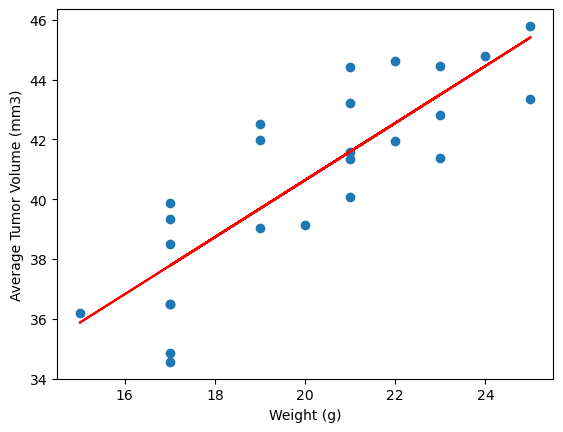

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute the Pearson correlation coefficient and print rounded to 2 decimal places 
correlation = st.pearsonr(weights,tumor_avg)
print(f'The correlation between mouse {xlabel} and {ylabel} is {round(correlation[0],2)}')

# Add the linear regression equation and line to plot
x_values = weights
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()